### Business Analytics Group Assignment - Predicting Airbnb Listing Prices in Melbourne__ {-}

--- 

**Kaggle Competition Ends:** Friday, 2 June 2023 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 2 June 2023 @ 11.59pm (Week 13)   

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict listed prices of Airbnb properties in Melbourne based on various Airbnb characteristics and regression models
- Assessment Summary:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new explanatory variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts and submit your predictions to Kaggle  
    - Each member of the team will record a video presentation of their work  
    - Marks will be awarded producing a prediction in the top 5 positions of their unit as well as for reaching the highest ranking on Kaggle amongst all teams.

**Instructions:** 

- Form a team of 3 students (minimum 2 students)  
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team in the competition [https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12](https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12)
    - Team leader to click on `team` and join and invite other team members to join
    - Your **team's name must start** with your unit code, for instance you could have a team called BUSA8001_masterful_geniuses or BUSA3020_l33t 
- All team members should work on all the tasks listed below however   
    - Choose a team member who will be responsible for one of each of the 3 tasks listed below    
- Your predictions must be generated by a model you develop here 
    - You will receive a mark of zero if your code provided here does not produce the forecasts you submit to Kaggle

**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 

**Competition Marks:**  

- 1 mark: Ranking in the top 5 places of your unit on Kaggle (make sure you name your team as instructed above)   
- 2 marks: Reaching the first place in your unit (make sure you name your team as instructed above)   


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Can do this as many times as necessary while building their model  
2. On iLearn **only team leader to submit** this Jupyter notebook re-named `Group_Assignment_Team_Name.ipynb` where Team_Name is your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and team name in the competition
    - Provide answers to the 3 Tasks below in the allocated cells including all codes/outputs/writeups 
    - One 15 minute video recording of your work 
        - Each team member to provide a 5 minute presentation of the Task that they led (it is best to jointly record your video using Zoom)
        - When recording your video make sure your face is visible, that you share your Jupyter Notebook and explain everything you've done in the submitted Jupyter notebook on screen
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
        
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)



---

**Fill out the following information**

For each team member provide name, Student ID number and which task is performed below

- Team Name on Kaggle: `BUSA8001_superhosts`
- Team Leader and Team Member 1: `Felix Rosenberger`
- Team Member 2: `John Rizk`

---

## Task 1: Problem Description and Initial Data Analysis {-}

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12](https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12)
2. Referring to Competition Overview and the data provided on Kaggle write about a 500 words **Problem Description** focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below, using the following headings:
    - Forecasting Problem - explain what you are trying to do and how it could be used in the real world (i.e. why it may be important)
    - Evaluation Criteria - explain the criteria is used to assess forecast performance 
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you found at this stage)
    - Hint: you should **not** discuss any specific predictive algorithms at this stage
    - Note: This task should be completed in a single Markdown cell (text box)
    
Total Marks: 12


In [248]:
# Task 1 code here
import pandas as pd
import numpy as np

# setting display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', None)

# read in data
trainpath = "train.csv"
df_train = pd.read_csv(trainpath, index_col='ID')
testpath = "test.csv"
df_test = pd.read_csv(testpath, index_col='ID')

# concatenate dataframes to reduce redundancies in operations
df = pd.concat([df_train, df_test])

#df.head()
#test_ids = df.ID.iloc[7000:].values
df.to_csv("df_1.csv")

In [249]:
# Data Cleaning

#Functions
def replace_string(df, c, s, r='', f='strip'):
    if f == 'find_replace':
        mask = (df[c].notnull()) & (df[c].astype(str).str.contains(s))
        df.loc[mask, c] = df.loc[mask, c].astype(str).str.replace(s, r)
    if f == 'replace':
        df[c] = df[c].replace(s, r)
    elif f == 'strip':
        df[c] = df[c].dropna().astype(str).str.replace(s, r, regex=True)
    return df

def replace_numeric(df, c, n, r=0, f='match'):
    if f == 'isgreater':
        df.loc[df[c] > n, c] = r
    elif f == 'isless':
        df.loc[df[c] < n, c] = r
    elif f == 'match':
        df.loc[df[c] == n, c] = r
    return df

def convert_numeric(df, c, t, d=1):
    df[c] = pd.to_numeric(df[c], errors='coerce')
    df[c] = df[c].astype(t)
    df[c] = df[c] / d
    return df


In [250]:
df2 = df

# price
df2 = replace_string(df2, 'price', '$','', 'strip')
df2 = replace_string(df2, 'price', ',','', 'strip')
df2 = convert_numeric(df2, 'price', 'float', 1)

# host_response_rate
df2 = replace_string(df2, 'host_response_rate', '%','', 'strip')
df2 = convert_numeric(df2, 'host_response_rate', 'float', 100)

# host_acceptance_rate
df2 = replace_string(df2, 'host_acceptance_rate', '%','', 'strip')
df2 = convert_numeric(df2, 'host_acceptance_rate', 'float', 100)

# bathrooms
df2 = replace_string(df2, 'bathrooms', 'Half-bath','0.5', 'find_replace')
df2 = replace_string(df2, 'bathrooms', 'half-bath','0.5', 'find_replace')
df2 = replace_string(df2, 'bathrooms', '[^0-9\.]','', 'strip')
df2 = convert_numeric(df2, 'bathrooms', 'float', 1)

# max/min nights - replace extreme values
df2 = replace_numeric(df2, 'maximum_nights', 9000, 1000, 'isgreater')
df2 = replace_numeric(df2, 'minimum_maximum_nights', 9000, 1000, 'isgreater')
df2 = replace_numeric(df2, 'maximum_maximum_nights', 9000, 1000, 'isgreater')
df2 = replace_numeric(df2, 'minimum_nights_avg_ntm', 9000, 1000, 'isgreater')
df2 = replace_numeric(df2, 'maximum_nights_avg_ntm', 9000, 1000, 'isgreater')

df2.to_csv("df_2.csv")

**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `work_email`, etc. from feature `host_verifications`.  
(2 marks)

In [251]:
df3 = df2

# Create new features email, phone and work_email from host_verifications
df3 = replace_string(df3, 'host_verifications', "['email']","'1','0','0'", 'replace')
df3 = replace_string(df3, 'host_verifications', "['phone']","'0','1','0'", 'replace')
df3 = replace_string(df3, 'host_verifications', "['email', 'phone']","'1','1','0'", 'replace')
df3 = replace_string(df3, 'host_verifications', "['phone', 'work_email']","'0','1','1'", 'replace')
df3 = replace_string(df3, 'host_verifications', "['email', 'phone', 'work_email']","'1','1','1'", 'replace')

df3[['email', 'phone', 'work_email']] = df3['host_verifications'].str.split(',', expand=True)

df3 = replace_string(df3, 'email', "'",'', 'strip')
df3 = convert_numeric(df3, 'email','int', 1)

df3 = replace_string(df3, 'phone', "'",'', 'strip')
df3 = convert_numeric(df3, 'phone','int', 1)

df3 = replace_string(df3, 'work_email', "'",'', 'strip')
df3 = convert_numeric(df3, 'work_email','int', 1)

df3.drop(['host_verifications'], axis=1, inplace=True)

In [ ]:
# Create new features smoke_alarm, kitchen, essential, hangers, wifi from amenities
# These are the top 5 ammenities in the dataset

from collections import Counter

amenity_count = Counter()
amenity_count_total = Counter()
count_total = []

for amenities_str in df3['amenities']:
    amenity_count_total = 0
    amenities_list = amenities_str.strip('][').replace('"', '').split(', ')
    for amenity in amenities_list:
        amenity_count[amenity] += 1
        amenity_count_total  += 1
    count_total.append(amenity_count_total)

df_amenities = pd.DataFrame(columns=[ 'amenity_count'])
df_amenities['amenity_count'] = amenity_count
df_amenities = df_amenities.sort_values('amenity_count', ascending=False)
df_amenities.head(5)

#df_acc = pd.DataFrame(columns=[ 'total_amenity_counts'])
#df_acc['total_amenity_counts'] = count_total
#df_acc
#print(acc)

#Smoke alarm	9548
#Kitchen	9383
#Essentials	9327
#Hangers	8702
#Wifi	8618

df3['amenity_count'] = count_total

df3[['smoke_alarm','kitchen','essentials','hangers','wifi']] = 0

for idx, amenities_str in df3['amenities'].items():
    amenities_list = amenities_str.strip('][').replace('"', '').split(', ')
    if 'Smoke alarm' in amenities_list:
        df3.loc[idx, 'smoke_alarm'] = 1
    if 'Kitchen' in amenities_list:
        df3.loc[idx, 'kitchen'] = 1        
    if 'Essentials' in amenities_list:
        df3.loc[idx, 'essentials'] = 1      
    if 'Hangers' in amenities_list:
        df3.loc[idx, 'hangers'] = 1      
    if 'Wifi' in amenities_list:
        df3.loc[idx, 'wifi'] = 1              


#df3.drop(['amenities'], axis=1, inplace=True) # needed in Felix notebook to calculate sum of amenities

df3

df3.to_csv("df_3.csv")


### <font color='darkblue'>New Features</font>
<font color='darkblue'>

#### <font color='darkblue'>host_verifications</font>    
Created new binary numeric features 'email', 'phone', 'work_email from 'host_verifications' and deleted the column 'host_verifications'
<br>
    
#### <font color='darkblue'>amenities</font>    
Create new binary numeric features 'smoke_alarm', 'kitchen', 'essential', 'hangers', 'wifi' from 'amenities' which are the top 5 amenities in the dataset and deleted the column 'amenities'.
<br>
</font>

**Task 2, Question 3**: Impute missing values for all features in both training and test datasets. Hint: make sure you do **not** impute the price in the test dataset.
(3 marks)

In [253]:
df4 = df3

from sklearn.impute import SimpleImputer

def impute_missing(df, c, s='most_frequent'):
    for col in c:
        i = SimpleImputer(missing_values = np.nan, strategy=s) 
        i = i.fit(df[[col]])
        df[[col]] = i.transform(df[[col]])
    return df

# host_location-> most_frequent
df4 = impute_missing(df4, ['host_location'], 'most_frequent')

# host_response_time -> most_frequent
df4 = impute_missing(df4, ['host_response_time'], 'most_frequent')

# host_response_rate, host_acceptance_rate -> mean
df4 = impute_missing(df4, ['host_response_rate', 'host_acceptance_rate'], 'mean')

# host_is_superhost -> most_frequent
df4 = impute_missing(df4, ['host_is_superhost'], 'most_frequent')

# host_neighbourhood, neighbourhood, neighbourhood_cleansed -> most_frequent
df4 = impute_missing(df4, ['host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed'], 'most_frequent')

# property_type, room_type -> most_frequent
df4 = impute_missing(df4, ['property_type', 'room_type'], 'most_frequent')

# bathrooms, bedrooms, beds, first_review -> median
df4 = impute_missing(df4, ['bathrooms','bedrooms','beds'], 'median')

# minimum_minimum_nights, maximum_maximum_nights -> median
df4 = impute_missing(df4, ['minimum_minimum_nights', 'maximum_maximum_nights'], 'median')

# availability_365 -> mean
df4 = impute_missing(df4, ['availability_365'], 'mean')

# first_review, last_review -> most_frequent
df4 = impute_missing(df4, ['first_review', 'last_review'], 'most_frequent')

#review_scores_accuracy, review_scores_checkin, review_scores_cleanliness, review_scores_communication, review_scores_location
# review_scores_rating, review_scores_value -> mean
df4 = impute_missing(df4, ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin',
                           'review_scores_communication', 'review_scores_location','review_scores_value'], 'mean')
# reviews_per_month -> mean
df4 = impute_missing(df4, ['reviews_per_month'], 'mean')

# email, phone, work_email from -> most_frequent
df4 = impute_missing(df4, ['email', 'phone', 'work_email'], 'most_frequent')

# smoke_alarm, kitchen, essentials, hangers, wifi -> most_frequent
df4 = impute_missing(df4, ['smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi'], 'most_frequent')

#df4

df4.to_csv("df_4.csv")

### <font color='darkblue'>Imputing missing values</font>
<font color='darkblue'>
<br>
Imputed missing values for all features except for 'description', 'neighborhood_overview', 'host_location' and 'host_about'.
<br>
<br>    

In [276]:
df5 = df4


#onehot encoder function
def onehot(df, c):
    for col in c:
        df = df.join(pd.get_dummies(df[[col]], drop_first=True))
        df.drop([col], axis=1, inplace=True)
    return df

#encode binary classifiers
# 'host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability','instant_bookable'
df5 = onehot(df5, ['source', 'host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability','instant_bookable'])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#encode source
#le = encoder.fit_transform(df5['source'].values)
#df5['source'] = le
#print('source:', encoder.classes_)

#encode room_type
le = encoder.fit_transform(df5['room_type'].values)
df5['room_type'] = le
room_type_classes = encoder.classes_


#encode top 5 property_type and other
top_5_property_type = df5['property_type'].value_counts().nlargest(5).index.tolist()  
encoder.fit(top_5_property_type + ['other'])  
#df5['property_type_encoded'] = df5['property_type'].apply(lambda x: x if x in top_5_property_type else 'other')
#df5['property_type'] = df5['property_type'].apply(lambda x: x if x in top_5_property_type else 'other')
#df5 = onehot(df5, ['property_type'])

df5['property_type_encoded'] = encoder.transform(df5['property_type'].apply(lambda x: x if x in top_5_property_type else 'other'))
df5.drop(['property_type'], axis=1, inplace=True)
df5 = df5.rename(columns={'property_type_encoded': 'property_type'})
property_type_classes = encoder.classes_


#encode top 5 neighbourhood_cleansed and other
top_5_neighbourhood_cleansed = df5['neighbourhood_cleansed'].value_counts().nlargest(5).index.tolist()  
encoder.fit(top_5_neighbourhood_cleansed + ['other'])  

df5['neighbourhood_cleansed'] = df5['neighbourhood_cleansed'].apply(lambda x: x if x in top_5_neighbourhood_cleansed else 'other')
#df5 = onehot(df5, ['neighbourhood_cleansed'])



#df5['neighbourhood_cleansed_encoded'] = encoder.transform(df5['neighbourhood_cleansed'].apply(lambda x: x if x in top_5_neighbourhood_cleansed else 'other'))
df5.drop(['neighbourhood_cleansed'], axis=1, inplace=True)
df5 = df5.rename(columns={'neighbourhood_cleansed_encoded': 'neighbourhood_cleansed'})
neighbourhood_cleansed_classes = encoder.classes_


# map/rank host_response_time
host_response_mapping = {'within an hour':1, 'within a few hours':2, 'within a day':3, 'a few days or more':4}
df5['host_response_time'] = df5['host_response_time'].map(host_response_mapping)

# convert host_since into days based on current date
from datetime import datetime
today = datetime.today()
df5['host_since'] = pd.to_datetime(df5['host_since'], format='%Y/%m/%d')
df5['host_since'] = (today - df5['host_since']).dt.days

#df5

df5.to_csv("df_5.csv")

In [255]:
df5

,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,neighbourhood,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,email,phone,work_email,amenity_count,smoke_alarm,kitchen,essentials,hangers,wifi,source_previous scrape,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,has_availability_t,instant_bookable_t,property_type_Entire home,property_type_Entire rental unit,property_type_Private room in home,property_type_Private room in rental unit,property_type_other
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,"The Stables, Richmond",Superbly located hotel style accommodation in ...,Richmond is a great neighbourhood. A beautifu...,Ione,3723,"Melbourne, Australia",I'm a working mum who loves being able to shar...,1,1.000000,0.980000,Richmond,2.0,"Richmond, Victoria, Australia",-37.82030,144.99016,0,2,1.0,1.0,1.0,"[""Sukin conditioner"", ""Extra pillows and blank...",2,14,2.0,2,1125,1125.0,2.0,1125.0,0,0,0,12.0,741,37,1,2013-03-29,2023-02-18,4.880000,4.910000,4.970000,4.940000,4.93000,4.930000,4.820000,2,2,0,0,6.110000,132.0,1.0,1.0,0.0,38,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1
1,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,Lindsay,5000,"Melbourne, Australia",As an artist working in animation and video I ...,2,1.000000,0.980000,Brunswick,1.0,"Brunswick East, Victoria, Australia",-37.76606,144.97951,2,2,1.0,1.0,1.0,"[""Extra pillows and blankets"", ""Laundromat nea...",4,27,4.0,4,27,27.0,4.0,27.0,0,12,22,112.0,169,25,3,2013-01-12,2023-03-08,4.480000,4.640000,3.970000,4.720000,4.69000,4.650000,4.600000,1,0,1,0,1.370000,39.0,1.0,1.0,0.0,57,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0
2,The Suite @ Angelus Retreat,<b>The space</b><br />Welcome to ANGELUS Retre...,NaN,Margaret Jiin,4197,"Melbourne, Australia",I have very special interests in Life and Life...,2,1.000000,0.780000,Central Business District,2.0,"Melbourne, Victoria, Australia",-37.90546,145.39447,0,4,2.5,2.0,4.0,"[""Microwave"", ""Hot tub"", ""Conditioner"", ""Smoke...",2,365,2.0,2,365,365.0,2.0,365.0,30,60,90,365.0,8,2,0,2015-07-06,2022-06-13,4.750000,4.880000,4.750000,4.880000,4.50000,5.000000,4.750000,2,2,0,0,0.090000,270.0,1.0,1.0,0.0,21,1,1,0,0,1,0,1,1,1,1,0,0,1,0,0,0
3,Million Dollar Views Over Melbourne,<b>The space</b><br /><b>Enjoy Million Dollar ...,NaN,Paul,4730,"Melbourne, Australia",Professional couple who enjoy entertaining in ...,3,0.750000,0.920000,Southbank,4.0,"Melbourne, Victoria, Australia",-37.82163,144.96672,2,2,2.5,1.0,1.0,"[""Hot tub"", ""Gym"", ""Washer"", ""Dryer"", ""Kitchen...",1,730,1.0,1,730,730.0,1.0,730.0,30,60,90,365.0,2,0,0,2011-10-16,2012-01-27,4.500000,4.000000,4.500000,4.000000,4.00000,5.000000,4.000000,1,0,1,0,0.010000,1000.0,1.0,1.0,0.0,13,0,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0
4,Melbourne - Old Trafford Apartment,After hosting many guests from all over the wo...,Our street is quiet & secluded but within walk...,Daryl & Dee,4701,"Berwick, Australia",We are an active couple who work from home and...,2,1.000000,0.870000,Central Business District,1.0,"Berwick, Victoria, Australia",-38.05725,145.33936,0,5,1.0

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [277]:
import numpy as np

df6 = df5
df6['log_price'] = np.log(df6['price'])

df6.to_csv("df_6.csv")





In [ ]:
df6['neighbourhood_cleansed']

<br>
<font color='darkblue'>
* Created <b>log_price</b> variable which is the logarithmic transformation of the price variable, to scale the price and reduce the effect of the outliers and make the distribution more normal.
</font>
<br>
<br>

In [ ]:

df7


#### <font color='darkblue'> Feature - selection
<font color='darkblue'>
* Dropped features for initial analysis.
<br>
<br>

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 
(2 marks)

`(Task 2, Question 6 Text Here)`

--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking {-}

Make sure you **clearly explain each step** you do, both in text and on the recoded video.

1. Build a machine learning (ML) regression model by taking into account the outcomes of Tasks 1 & 2 (Explain carefully)
2. Fit the model and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Create predictions using the test dataset and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and Comment
5. Make sure your Python code works, so that a marker that can replicate your all of your results and obtain the same RMSE from Kaggle

- Hint: to perform well in this assignment you will need to iterate Tasks 2 & 3, creating new features and training various models in order to find the best one.

Total Marks: 12

In [ ]:
df9 = df7
df9.to_csv("df_9.csv")

df_test_train = pd.read_csv("df_7.csv")

df_train = df_test_train.iloc[:7000]
df_train = df_train[df_train['price'] < 4000]

df_test = df_test_train.iloc[7000:]

y_train = df_train['log_price'].values.ravel()

#y_test = df_test['log_price']

X_train = df_train.drop(['ID', 'price','log_price','latitude','longitude','source_previous scrape'], axis=1).values

X_test = df_test.drop(['ID', 'price','log_price','latitude','longitude','source_previous scrape'], axis=1).values



In [257]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score, KFold


In [155]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def get_outliers(data, threshold=3):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
    z_scores = scaled_data.flatten()
    outlier_locations = np.where(np.abs(z_scores) > threshold)[0]
    outlier_values = data[outlier_locations]
    outlier_df = pd.DataFrame({'Outlier': outlier_values})
    return outlier_df

#print(len(df))


#print(len(df))

In [432]:
# RandomForestRegressor

#df6  = pd.read_csv('df_6.csv')

df_train = df6[:7000]
#df_train = df_train[df_train['price'] < 4001]

# Remove Age outliers
#price_outlier = get_outliers(df_train['price'])
#df_train = df_train[~df_train['price'].isin(price_outlier['Outlier'].values)]
#df_train.reset_index(drop=True, inplace=True)


df_test = df6[7000:]



columns_to_drop = [
'name','description','neighborhood_overview','host_name','host_location','host_about',
'host_neighbourhood','neighbourhood','amenities','first_review','last_review',
    
   
'price'
,'log_price'

#,'room_type'
#,'bedrooms'
#,'accommodates'
#,'bathrooms'
#,'calculated_host_listings_count_private_rooms'
#,'instant_bookable_t'
#,'availability_30'

#,'calculated_host_listings_count_entire_homes'
#,'host_identity_verified_t'

#,'number_of_reviews_l30d'
#,'maximum_maximum_nights'
#,'review_scores_location'
#,'minimum_nights'
#,'availability_60'
#,'maximum_nights_avg_ntm'

,'email'
,'calculated_host_listings_count'
,'property_type'
,'maximum_minimum_nights'
,'review_scores_rating'
,'minimum_minimum_nights'
,'longitude'
,'review_scores_value'
,'number_of_reviews'
,'minimum_nights_avg_ntm'
,'review_scores_cleanliness'
,'source_previous scrape'
,'availability_365'
,'smoke_alarm'
,'review_scores_communication'
,'host_response_time'
,'host_listings_count'
,'calculated_host_listings_count_shared_rooms'
,'number_of_reviews_ltm'
,'availability_90'
,'host_acceptance_rate'
,'latitude'
,'amenity_count'
,'hangers'
,'host_response_rate'
,'reviews_per_month'
,'essentials'
,'kitchen'
,'review_scores_accuracy'
,'maximum_nights'
,'review_scores_checkin'
,'beds'
,'host_since'
,'minimum_maximum_nights'
,'work_email'
,'wifi'
,'host_is_superhost_t'
,'host_has_profile_pic_t'
,'phone'
,'has_availability_t'


]

y_train = df_train['log_price'].values

X_train = df_train.drop(columns=columns_to_drop).values

X_test =  df_test.drop(columns=columns_to_drop).values
  
    
    

param_grid = {
    'n_estimators': [100, 200, 300,400,500,600,700,800],  # Number of boosting stages to perform
#    'learning_rate': [0.1, 0.05, 0.01],  # Learning rate shrinks the contribution of each tree
    'min_samples_split': [2, 5, 10,20,50],
    'max_depth': [3, 4, 5, 10, 15, 20, 25, 30,50 ]  # Maximum depth of each decision tree
}

#gb_model = RandomForestRegressor(random_state=42)

#grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs = 24)

#grid_search.fit(X_train, y_train)
#best_params = grid_search.best_params_
#print(best_params)

#pipe = make_pipeline(StandardScaler(),
#                    RandomForestRegressor(random_state=42, **best_params))
    
#pipe = make_pipeline(StandardScaler(),
#                     RandomForestRegressor(random_state=42, n_estimators=100 , max_depth=700, min_samples_split=50))

pipe = make_pipeline(StandardScaler(),
                     RandomForestRegressor(random_state=42, n_estimators=100 , max_depth=1700,max_features=1,
                                          bootstrap=False,criterion='squared_error',
                                          n_jobs=-1
                                          ))



#changed to n_estimators=8 and test


#pipe = make_pipeline(StandardScaler(),
#                     RandomForestRegressor(random_state=42, n_estimators=20 , max_depth=700))
          
    
#{'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 700}    
    
    
x = pipe.fit(X_train, y_train)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)
y_pred_dollar = np.round(np.exp(y_pred))

y_train_dollar = np.round(np.exp(y_train))



cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-cv_scores)
# Print the RMSE scores for each fold
for i, rmse in enumerate(rmse_scores):
    print("Fold {}: RMSE = {:.4f}".format(i+1, rmse))

# Calculate and print the average RMSE across all folds
average_rmse = np.mean(rmse_scores)
print("Average RMSE: {:.4f}".format(average_rmse*100))




    
x = pipe.fit(X_train, y_train)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)
y_pred_dollar = np.round(np.exp(y_pred))

y_train_dollar = np.round(np.exp(y_train))


rmse = np.sqrt(mean_squared_error(y_train_dollar, y_pred_dollar))
print(f'Root Mean Squared Error: {rmse}')

train_pred = pd.DataFrame({"price":y_train_dollar, "pred":y_pred_dollar})
print(train_pred.head(5))


#df_test = pd.read_csv("test.csv")
#X_test = df_test.drop(['ID'], axis=1).values
y_pred = pipe.predict(X_test)
y_pred_dollar = np.round(np.exp(y_pred))

#test_pred = pd.DataFrame({"price":y_test_dollar, "pred":y_test_pred_dollar})
#test_pred.head(100)


test_id = np.arange(7000, 10000, 1)
pred = pd.DataFrame({"ID":test_id, "price": np.exp(y_pred)})
pred.to_csv("pricepredictions.csv", index=False, header=True)
pred.head(5)

Fold 1: RMSE = 0.4342
Fold 2: RMSE = 0.4364
Fold 3: RMSE = 0.5016
Fold 4: RMSE = 0.4327
Fold 5: RMSE = 0.4236
Average RMSE: 44.5701
Root Mean Squared Error: 5.7970189383362
    price    pred
0   132.0   132.0
1    39.0    39.0
2   270.0   270.0
3  1000.0  1000.0
4   116.0   116.0


,ID,price
0,7000,170.744472
1,7001,155.112161
2,7002,74.197231
3,7003,118.517587
4,7004,92.543113


In [ ]:
df6

In [196]:
train_pred

,price,pred
0,132.0,149.0
1,39.0,39.0
2,270.0,270.0
3,1000.0,1000.0
4,116.0,116.0
...,...,...
6986,341.0,341.0
6987,254.0,254.0
6988,179.0,179.0
6989,380.0,380.0


In [78]:
# LASSO
from sklearn.linear_model import Lasso

#df6  = pd.read_csv('df_6.csv')

df_train = df6[:7000]

df_test = df6[7000:]
columns_to_drop = [
'name','description','neighborhood_overview','host_name','host_location','host_about',
'host_neighbourhood','neighbourhood','amenities','first_review','last_review',
'price'
,'log_price'


#,'property_type_Private room in home'
#,'availability_30'
#,'calculated_host_listings_count_entire_homes'
#,'calculated_host_listings_count_shared_rooms'
    
    
    
    
#,'maximum_nights_avg_ntm'
#,'instant_bookable_t'
#,'maximum_maximum_nights'
#,'number_of_reviews_l30d'
#,'minimum_minimum_nights'
    
,'review_scores_location'
,'calculated_host_listings_count'
    
,'property_type_Entire home'
,'maximum_minimum_nights'
,'smoke_alarm'
,'review_scores_rating'
,'property_type_other'
,'minimum_nights'
,'availability_365'
,'number_of_reviews_ltm'
,'availability_60'
,'source_previous scrape'
,'review_scores_communication'
,'review_scores_value'
,'review_scores_cleanliness'
,'availability_90'
,'neighbourhood_cleansed_Port Phillip'
,'reviews_per_month'
,'longitude'
,'minimum_maximum_nights'
,'host_acceptance_rate'
,'neighbourhood_cleansed_Yarra Ranges'
,'minimum_nights_avg_ntm'
,'maximum_nights'
,'email'
,'amenity_count'
,'host_response_rate'
,'review_scores_accuracy'
,'number_of_reviews'
,'host_listings_count'
,'review_scores_checkin'
,'neighbourhood_cleansed_Yarra'
,'neighbourhood_cleansed_Stonnington'
,'beds'
,'property_type_Entire rental unit'
,'work_email'
,'latitude'
,'hangers'
,'host_since'
,'host_is_superhost_t'
,'kitchen'
,'wifi'
,'property_type_Private room in rental unit'
,'host_response_time'
,'host_has_profile_pic_t'
,'essentials'
,'host_identity_verified_t'
,'phone'
,'has_availability_t'
    
]

y_train = df_train['log_price'].values

X_train = df_train.drop(columns=columns_to_drop).values

X_test =  df_test.drop(columns=columns_to_drop).values
  

    
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'max_iter': [1000, 2000, 3000,4000],
    'tol': [0.01,0.001, 0.0001, 0.00001]
}


gb_model = Lasso(random_state=42)

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=24)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

pipe = make_pipeline(StandardScaler(),
                     Lasso(random_state=42, **best_params))    
    
    
    
    
    
    
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)
y_pred_dollar = np.round(np.exp(y_pred))

y_train_dollar = np.round(np.exp(y_train))




rmse = np.sqrt(mean_squared_error(y_train_dollar, y_pred_dollar))
print(f'Root Mean Squared Error: {rmse}')

train_pred = pd.DataFrame({"price":y_train_dollar, "pred":y_pred_dollar})
train_pred.head(5)

y_pred = pipe.predict(X_test)
y_pred_dollar = np.round(np.exp(y_pred))

test_id = np.arange(7000, 10000, 1)
pred = pd.DataFrame({"ID":test_id, "price":np.exp(y_pred)})
pred.to_csv("pricepredictions3.csv", index=False, header=True)
pred.head(5)

Root Mean Squared Error: 2325.1599015981674


,ID,price
0,7000,199.832025
1,7001,172.986863
2,7002,108.010179
3,7003,126.183234
4,7004,121.769354


In [ ]:
# GradientBoostingRegressor
from sklearn.linear_model import Lasso

#df6  = pd.read_csv('df_6.csv')

df_train = df6[:7000]
#df_train = df_train[df_train['price'] < 4000]

df_test = df6[7000:]


columns_to_drop = [
'name','description','neighborhood_overview','host_name','host_location','host_about',
'host_neighbourhood','neighbourhood','amenities','first_review','last_review',
    
   
'price'
,'log_price'
   
#,'calculated_host_listings_count_private_rooms'
    
#,'instant_bookable_t'
#,'availability_30'
,'calculated_host_listings_count_entire_homes'
#,'host_identity_verified_t'

#,'number_of_reviews_l30d'

#,'maximum_maximum_nights'

    
#,'review_scores_location'
#,'minimum_nights'
#,'availability_60'
#,'maximum_nights_avg_ntm'
#,'email'
,'calculated_host_listings_count'
#,'property_type'
#,'maximum_minimum_nights'
#,'review_scores_rating'
#,'minimum_minimum_nights'
,'longitude'
,'review_scores_value'
,'number_of_reviews'
,'minimum_nights_avg_ntm'
,'review_scores_cleanliness'
,'source_previous scrape'
,'availability_365'
,'smoke_alarm'
,'review_scores_communication'
,'host_response_time'
,'host_listings_count'
,'calculated_host_listings_count_shared_rooms'
,'number_of_reviews_ltm'
,'availability_90'
,'host_acceptance_rate'
,'latitude'
,'amenity_count'
,'hangers'
,'host_response_rate'
,'reviews_per_month'
,'essentials'
,'kitchen'
,'review_scores_accuracy'
,'maximum_nights'
,'review_scores_checkin'
,'beds'
,'host_since'
,'minimum_maximum_nights'
,'work_email'
,'wifi'
,'host_is_superhost_t'
,'host_has_profile_pic_t'
,'phone'
,'has_availability_t'

]

y_train = df_train['log_price'].values

X_train = df_train.drop(columns=columns_to_drop).values

X_test =  df_test.drop(columns=columns_to_drop).values
  


    
    
param_grid = {
    'n_estimators': [100, 200, 300,400,500],  # Number of boosting stages to perform
    'learning_rate': [0.1, 0.05, 0.01,0.5],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5]  # Maximum depth of each decision tree
}

gb_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=24)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)
#pipe = make_pipeline(StandardScaler(),
#                     GradientBoostingRegressor(random_state=42, **best_params))    
    
pipe = make_pipeline(StandardScaler(),
                     GradientBoostingRegressor(random_state=42, n_estimators=10 , learning_rate=0.1 , max_depth=1000))    
    
    

    

cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the root mean squared error (RMSE)
rmse_scores = np.sqrt(-cv_scores)

# Print the RMSE scores for each fold
for i, rmse in enumerate(rmse_scores):
    print("Fold {}: RMSE = {:.4f}".format(i+1, rmse))

# Calculate and print the average RMSE across all folds
average_rmse = np.mean(rmse_scores)
print("Average RMSE: {:.4f}".format(average_rmse*100))    
    
    
    
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)
y_pred_dollar = np.round(np.exp(y_pred))

y_train_dollar = np.round(np.exp(y_train))


rmse = np.sqrt(mean_squared_error(y_train_dollar, y_pred_dollar))
print(f'Root Mean Squared Error: {rmse}')

train_pred = pd.DataFrame({"price":y_train_dollar, "pred":y_pred_dollar})
train_pred.head(5)

y_pred = pipe.predict(X_test)
y_pred_dollar = np.round(np.exp(y_pred))

test_id = np.arange(7000, 10000, 1)
pred = pd.DataFrame({"ID":test_id, "price":np.exp(y_pred)})
pred.to_csv("pricepredictions1.csv", index=False, header=True)
pred.head(5)


{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
Fold 1: RMSE = 0.5694
Fold 2: RMSE = 0.5532
Fold 3: RMSE = 0.6052
Fold 4: RMSE = 0.5441
Fold 5: RMSE = 0.5224
Average RMSE: 55.8874
Root Mean Squared Error: 2074.138323531692


,ID,price
0,7000,192.350908
1,7001,180.585257
2,7002,238.910063
3,7003,159.595435
4,7004,159.966585


In [75]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

#df6  = pd.read_csv('df_6.csv')

df_train = df6[:7000]

df_test = df6[7000:]

    
columns_to_drop = [
'name','description','neighborhood_overview','host_name','host_location','host_about',
'host_neighbourhood','neighbourhood','amenities','first_review','last_review',
   
'price'
,'log_price'


#,'property_type_Private room in home'
#,'availability_30'
#,'calculated_host_listings_count_entire_homes'
#,'calculated_host_listings_count_shared_rooms'
    
    
    
    
#,'maximum_nights_avg_ntm'
#,'instant_bookable_t'
#,'maximum_maximum_nights'
#,'number_of_reviews_l30d'
#,'minimum_minimum_nights'
    
,'review_scores_location'
,'calculated_host_listings_count'
    
,'property_type_Entire home'
,'maximum_minimum_nights'
,'smoke_alarm'
,'review_scores_rating'
,'property_type_other'
,'minimum_nights'
,'availability_365'
,'number_of_reviews_ltm'
,'availability_60'
,'source_previous scrape'
,'review_scores_communication'
,'review_scores_value'
,'review_scores_cleanliness'
,'availability_90'
,'neighbourhood_cleansed_Port Phillip'
,'reviews_per_month'
,'longitude'
,'minimum_maximum_nights'
,'host_acceptance_rate'
,'neighbourhood_cleansed_Yarra Ranges'
,'minimum_nights_avg_ntm'
,'maximum_nights'
,'email'
,'amenity_count'
,'host_response_rate'
,'review_scores_accuracy'
,'number_of_reviews'
,'host_listings_count'
,'review_scores_checkin'
,'neighbourhood_cleansed_Yarra'
,'neighbourhood_cleansed_Stonnington'
,'beds'
,'property_type_Entire rental unit'
,'work_email'
,'latitude'
,'hangers'
,'host_since'
,'host_is_superhost_t'
,'kitchen'
,'wifi'
,'property_type_Private room in rental unit'
,'host_response_time'
,'host_has_profile_pic_t'
,'essentials'
,'host_identity_verified_t'
,'phone'
,'has_availability_t'

    
]
    

y_train = df_train['log_price'].values

X_train = df_train.drop(columns=columns_to_drop).values

X_test =  df_test.drop(columns=columns_to_drop).values


param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'l1_ratio': [0.2, 0.5, 0.8],
    'max_iter': [1000, 2000, 3000],
    'tol': [0.001, 0.0001, 0.00001]
}

gb_model = ElasticNet()

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=24)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

pipe = make_pipeline(StandardScaler(),
                     ElasticNet(**best_params))    
    
    
    
    
    
    
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)
y_pred_dollar = np.round(np.exp(y_pred))

y_train_dollar = np.round(np.exp(y_train))


rmse = np.sqrt(mean_squared_error(y_train_dollar, y_pred_dollar))
print(f'Root Mean Squared Error: {rmse}')

train_pred = pd.DataFrame({"price":y_train_dollar, "pred":y_pred_dollar})
train_pred.head(5)

y_pred = pipe.predict(X_test)
y_pred_dollar = np.round(np.exp(y_pred))

test_id = np.arange(7000, 10000, 1)
pred = pd.DataFrame({"ID":test_id, "price":np.exp(y_pred)})
pred.to_csv("pricepredictions2.csv", index=False, header=True)
pred.head(5)


Root Mean Squared Error: 2323.866960201097


,ID,price
0,7000,217.297365
1,7001,172.425550
2,7002,107.279604
3,7003,139.064428
4,7004,135.960134


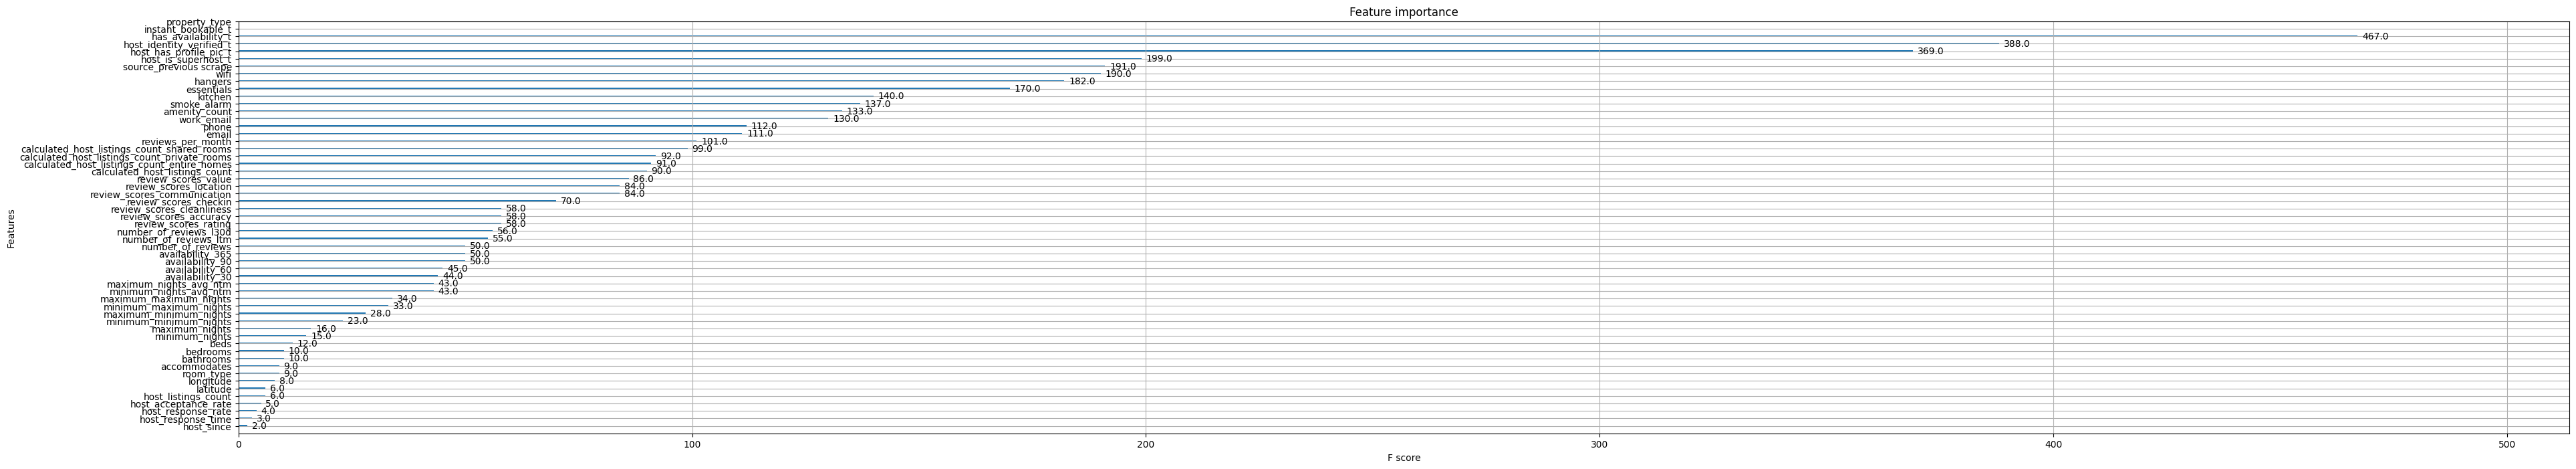

In [289]:
import pandas as pd
from xgboost import plot_importance, DMatrix
import xgboost as xgb
import matplotlib.pyplot as plt

#df6  = pd.read_csv('df_6.csv')

df_train = df6[:7000]

#df_X = df_train[df_train['price'] < 4000]
df_X = df_train

columns_to_drop = [
'name','description','neighborhood_overview','host_name','host_location','host_about',
'host_neighbourhood','neighbourhood','amenities','first_review','last_review','price',
'log_price'
]


y_train = df_X['log_price'].values

X_train = df_X.drop(columns=columns_to_drop).values

feature_names = df_train.drop(columns=columns_to_drop).columns
model = xgb.XGBRegressor()

model.fit(X_train, y_train)

importance = model.feature_importances_

fig, ax = plt.subplots(figsize=(45, 8))
plot_importance(model, ax=ax)
ax.set_yticks(range(len(feature_names)))
ax.set_yticklabels(feature_names)
plt.show()

In [290]:
df_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importance })

df_importances['Rank'] = df_importances['Importance'].rank(ascending=False)

# Sort the importances by rank
df_importances = df_importances.sort_values(by='Rank')

# Print the feature importances with ranks
print(len(importance))
print(len(feature_names))
df_importances

55
55


,Feature,Importance,Rank
7,room_type,0.219725,1.0
10,bedrooms,0.181428,2.0
8,accommodates,0.170846,3.0
9,bathrooms,0.040823,4.0
36,calculated_host_listings_count_private_rooms,0.027763,5.0
53,instant_bookable_t,0.025786,6.0
20,availability_30,0.021285,7.0
35,calculated_host_listings_count_entire_homes,0.016656,8.0
51,host_identity_verified_t,0.011900,9.0
26,number_of_reviews_l30d,0.011836,10.0


In [ ]:
print(feature_names)

In [ ]:
#df_test = pd.read_csv("test.csv")
#X_test = df_test.drop(['ID'], axis=1).values
y_pred = pipe.predict(X_test)
y_pred_dollar = np.round(np.exp(y_pred))

#test_pred = pd.DataFrame({"price":y_test_dollar, "pred":y_test_pred_dollar})
#test_pred.head(100)


test_id = np.arange(7000, 10000, 1)
pred = pd.DataFrame({"ID":test_id, "price":y_pred_dollar})
pred.to_csv("pricepredictions.csv", index=False, header=True)
pred.head(100)

In [ ]:
print("Best Hyperparameters:", best_params)

In [ ]:

y_test_pred = pipe.predict(X_test)
y_test_pred_dollar = np.round(np.exp(y_test_pred))

y_test_dollar = np.round(np.exp(y_test))
rmse = np.sqrt(mean_squared_error(y_test_dollar, y_test_pred_dollar))
print(f'Root Mean Squared Error: {rmse}')

test_pred = pd.DataFrame({"price":y_test_dollar, "pred":y_test_pred_dollar})
test_pred.head(100)
#print(train_pred.head(15))


#test_id = np.arange(7000, 10000, 1)
#pred = pd.DataFrame({"ID":test_id, "price":y_pred_dollar})
#pred.to_csv("pricepredictions.csv", index=False, header=True)


In [ ]:
y_pred1 = pipe.predict(X_test)

y_pred1_dollar = np.round(np.exp(y_pred1))
test_id = np.arange(7000, 10000, 1)
pred = pd.DataFrame({"ID":test_id, "price":y_pred1_dollar})
pred.to_csv("pricepredictions.csv", index=False, header=True)

In [ ]:
xxxx = sum(train_pred['price']) - sum(train_pred['pred']) 

xxxx

#test_id = np.arange(7000, 10000, 1)
#pred = pd.DataFrame({"ID":test_id, "price":y_pred_dollar})
#pred.to_csv("pricepredictions.csv", index=False, header=True)

#train_pred.to_csv("train_pred.csv")

In [ ]:
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))


param_grid = {'randomforestregressor__n_estimators': [100, 200, 300],
              'randomforestregressor__max_depth': [1, 3, 5, 10, 20, None]
              }

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_model)
print(best_params)

In [ ]:
print(xxx['price'] > 4000)

In [ ]:
df

In [ ]:
df7

In [ ]:
# columns_to_drop = [
# 'name','description','neighborhood_overview','host_name','host_location','host_about',
# 'host_neighbourhood','neighbourhood','amenities','first_review','last_review',
    
# 'minimum_minimum_nights',
# 'maximum_minimum_nights',
# 'minimum_maximum_nights',
# 'maximum_maximum_nights',
# 'minimum_nights_avg_ntm',
# 'maximum_nights_avg_ntm',

# 'calculated_host_listings_count',
# 'calculated_host_listings_count_entire_homes',
# 'calculated_host_listings_count_private_rooms',
# 'calculated_host_listings_count_shared_rooms'
    
# ,'price'
# ,'host_since'
# ,'host_response_time'
# #,'host_response_rate'
# #,'host_acceptance_rate'
# ,'host_listings_count'
# ,'latitude'
# ,'longitude'
# #,'room_type'
# #,'accommodates'
# #,'bathrooms'
# #,'bedrooms'
# #,'beds'
# ,'minimum_nights'
# ,'maximum_nights'
# ,'availability_30'
# ,'availability_60'
# ,'availability_90'
# ,'availability_365'
# #,'number_of_reviews'
# #,'number_of_reviews_ltm'
# ,'number_of_reviews_l30d'
# #,'review_scores_rating'
# #,'review_scores_accuracy'
# #,'review_scores_cleanliness'
# #,'review_scores_checkin'
# #,'review_scores_communication'
# #,'review_scores_location'
# #,'review_scores_value'
# ,'email'
# ,'phone'
# ,'work_email'
# ,'amenity_count'
# ,'smoke_alarm'
# #,'kitchen'
# ,'essentials'
# ,'hangers'
# #,'wifi'
# ,'source_previous scrape'
# ,'host_is_superhost_t'
# ,'host_has_profile_pic_t'
# ,'host_identity_verified_t'
# #,'has_availability_t'
# ,'instant_bookable_t'
# #,'property_type'
# #,'neighbourhood_cleansed'
# ,'log_price'

# ]
